In [ ]:
DAILY_DATA_PATH = "../data/interim/daily_data.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
def rmse(y, t):
  return np.sqrt(np.mean((y - t)**2))

In [ ]:
df = pd.read_csv(DAILY_DATA_PATH)
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)
df.index.freq = '1D'
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
Date Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01,993.296224,-3.362448,270.319580,-7.272098,74.953357,4.881888,3.554685,1.327413,2.229371,3.580070,...,0.886014,1.605804,178.867413,0.000000,0.000000,58.551119,90.925105,94.176014,10.099021,443.863636
2017-01-02,991.612222,-0.730417,273.087222,-2.933750,85.047222,5.806528,4.941736,0.864028,3.105556,4.983125,...,1.878056,3.373056,209.636111,0.002083,121.944444,19.536597,37.859306,46.845278,10.440556,428.882639
2017-01-03,992.582639,1.384097,275.130069,-1.990069,78.212500,6.762847,5.280556,1.482847,3.316111,5.320556,...,2.392569,4.875903,232.829861,0.000000,15.555556,22.890139,48.076181,54.296806,11.752083,415.114583
2017-01-04,981.120556,2.290972,276.956597,-1.145486,78.137639,7.220208,5.630556,1.590069,3.577639,5.739306,...,3.666111,7.208125,250.679167,0.010417,27.986111,27.245417,53.143681,80.150625,11.856389,411.563889
2017-01-05,998.896181,-3.516111,269.735625,-6.855486,77.937222,4.745208,3.679722,1.065903,2.295625,3.685417,...,2.322014,4.481528,147.092292,0.007639,179.652778,24.196597,49.501250,58.527708,8.594653,413.460417


In [ ]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', name='Date Time', length=2923, freq='D')

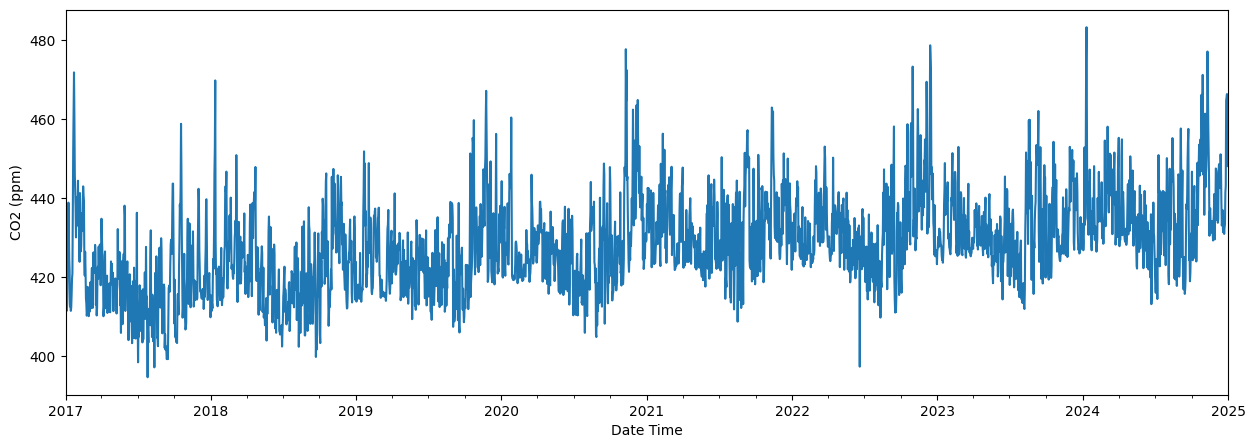

In [ ]:
df['CO2 (ppm)'].plot(figsize=(15,5))
plt.ylabel("CO2 (ppm)")
plt.show();

In [ ]:
# Train-test split

N_test = 365  # Last year as the test set
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

# Holt-Winters'

Train RMSE: 7.459791808097866
Test RMSE: 13.587651862545014


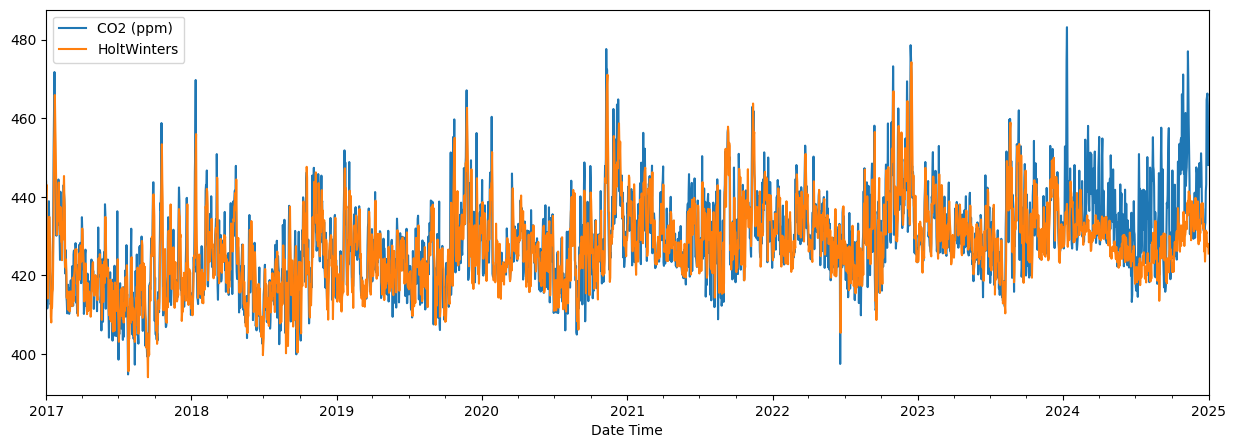

In [ ]:
hw = ExponentialSmoothing(
    train['CO2 (ppm)'],
    trend='add', seasonal='add', seasonal_periods=365
)
res_hw = hw.fit()

df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

df[['CO2 (ppm)', 'HoltWinters']].plot(figsize=(15,5));  # trend='add', seasonal='add'

print("Train RMSE:", rmse(train['CO2 (ppm)'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['CO2 (ppm)'], res_hw.forecast(N_test)))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Train RMSE: 7.453647806273793
Test RMSE: 11.004283298023163


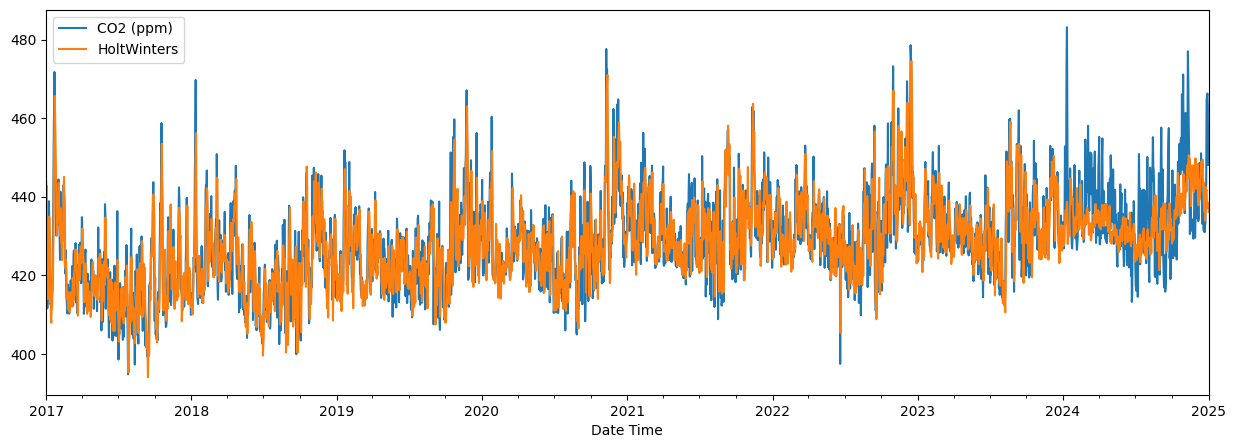

In [ ]:
hw = ExponentialSmoothing(
    train['CO2 (ppm)'],
    trend='mul', seasonal='add', seasonal_periods=365
)
res_hw = hw.fit()

df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

df[['CO2 (ppm)', 'HoltWinters']].plot(figsize=(15,5));  # trend='mul', seasonal='add'

print("Train RMSE:", rmse(train['CO2 (ppm)'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['CO2 (ppm)'], res_hw.forecast(N_test)))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Train RMSE: 7.409998554256943
Test RMSE: 12.162852626824344


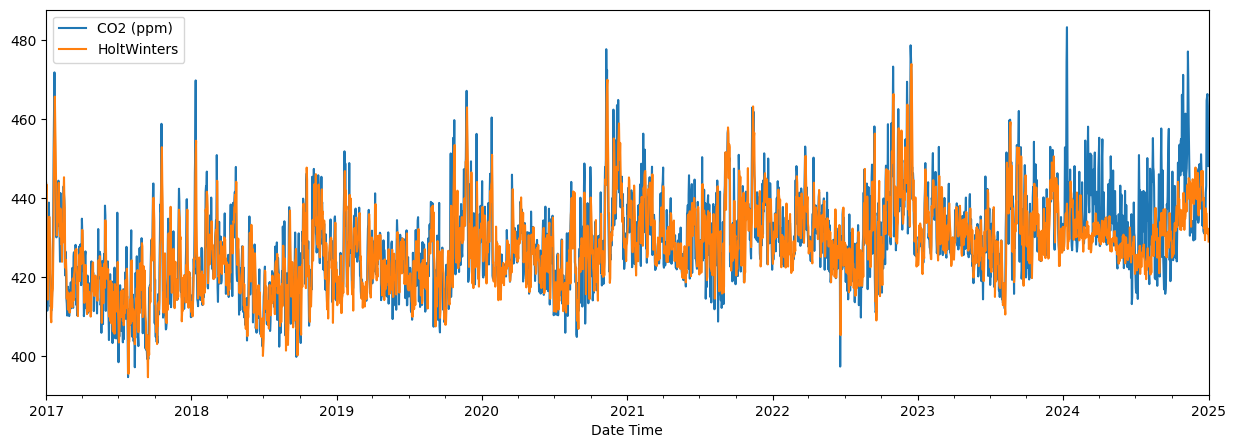

In [ ]:
hw = ExponentialSmoothing(
    train['CO2 (ppm)'],
    trend='add', seasonal='mul', seasonal_periods=365
)
res_hw = hw.fit()

df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

df[['CO2 (ppm)', 'HoltWinters']].plot(figsize=(15,5));  # trend='add', seasonal='mul'

print("Train RMSE:", rmse(train['CO2 (ppm)'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['CO2 (ppm)'], res_hw.forecast(N_test)))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Train RMSE: 7.409818748429894
Test RMSE: 14.2039056914938


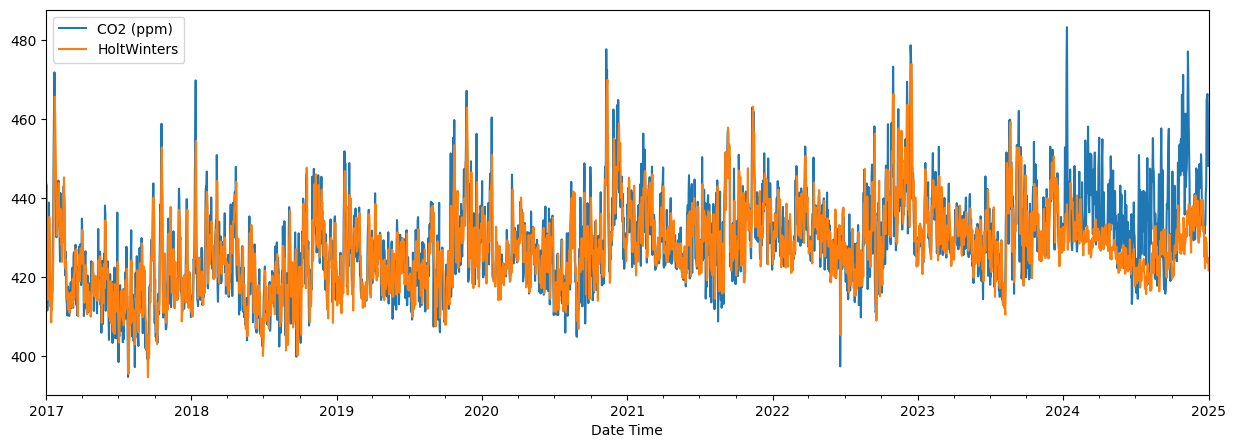

In [ ]:
hw = ExponentialSmoothing(
    train['CO2 (ppm)'],
    trend='mul', seasonal='mul', seasonal_periods=365
)
res_hw = hw.fit()

df.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)

df[['CO2 (ppm)', 'HoltWinters']].plot(figsize=(15,5));  # trend='mul', seasonal='mul'

print("Train RMSE:", rmse(train['CO2 (ppm)'], res_hw.fittedvalues))
print("Test RMSE:", rmse(test['CO2 (ppm)'], res_hw.forecast(N_test)))

# ARIMA

In [4]:
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv(DAILY_DATA_PATH)
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)
df.index.freq = '1D'

## Checking for Stationarity

Stationarity decides the value of $d$ of the model $\mathrm{ARIMA}(p, d, q)$. We determine whether the data is stationary or not using the augmented Dickey-Fuller (ADF) test.

In [6]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [7]:
adf(df['CO2 (ppm)'])

Test-Statistic: -4.840799054007517
P-Value: 4.541064621177018e-05
Stationary


The ADF test revels that the data is already stationary. Hence, we pick $d = 0$, i.e., we do not need differencing.

## Checking Autocorrelation

The autocorrelation plot decides the value of $q$ of the model $\mathrm{ARIMA}(p, d, q)$.

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

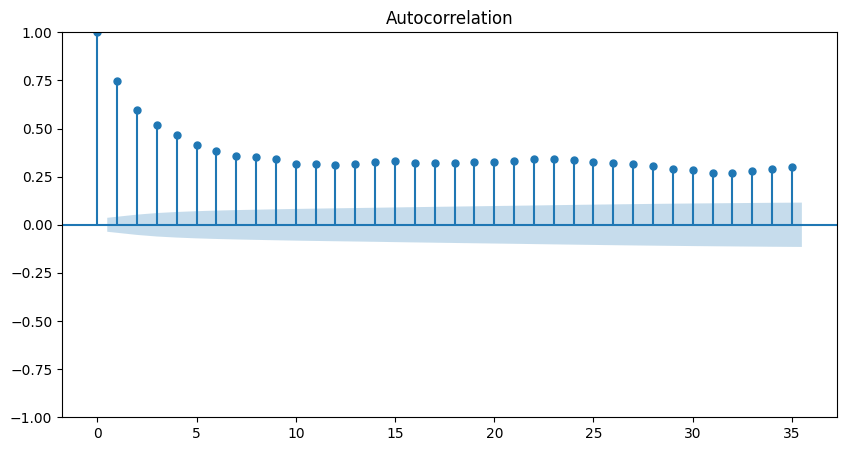

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['CO2 (ppm)'], ax=ax);

Looks like $q = 15$ would be a resonable choice. Here, we face a tradeoff. If we keep the value of $q$ too high, the model will have too many parameters to learn and hence take a long time to learn. If we keep its value too small, the model would not capture sufficient complexity.

## Checking Partial Autocorrelation

The partial autocorrelation plot decides the value of $p$ of the model $\mathrm{ARIMA}(p, d, q)$.

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

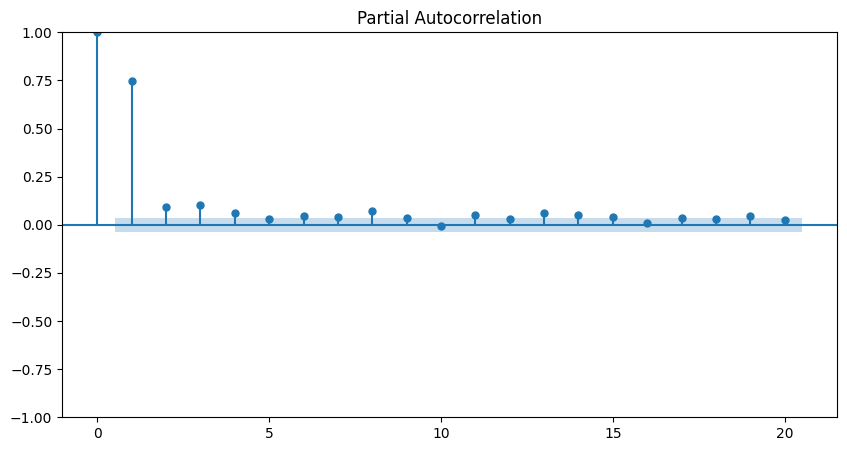

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['CO2 (ppm)'], ax=ax, lags=20);

Looks like $p=8$ is the best.

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [23]:
p = 8
d = 0
q = 15

arima = ARIMA(train['CO2 (ppm)'], order=(p,d,q))

In [24]:
arima_result = arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [25]:
def plot_fit_and_forecast_int(result, d, col='CO2 (ppm)'):
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.predict(start=train.index[d], end=train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha=0.3)
  ax.legend()

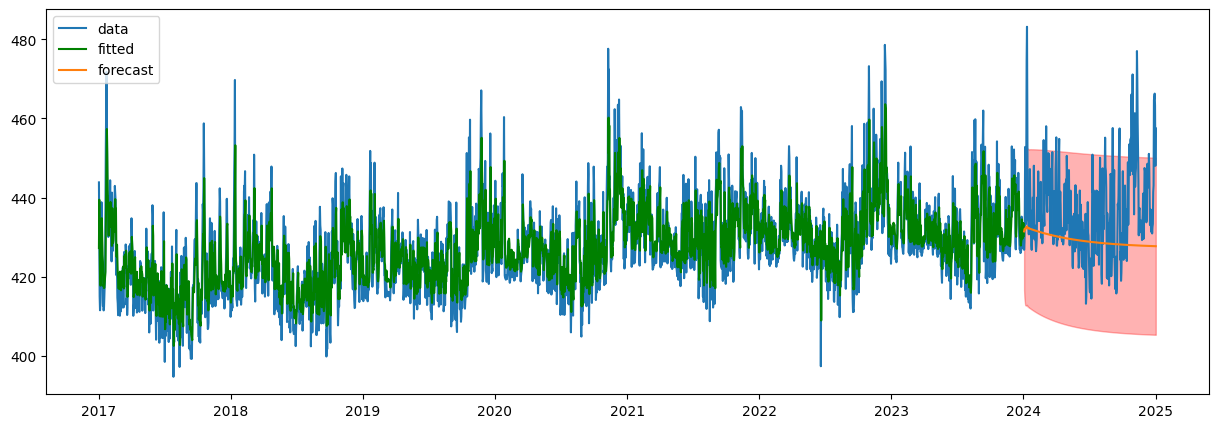

In [26]:
plot_fit_and_forecast_int(arima_result, d=d)

# Machine Learning Models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error

In [4]:
df = pd.read_csv(DAILY_DATA_PATH)
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)
df.index.freq = '1D'

In [5]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
# Make supervised dataset
# let's see if we can use T past values to predict the next value

series = df['CO2 (ppm)'].to_numpy()

T = 30  # Using past month's data to predict one future value
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2893, 30) Y.shape (2893,)


In [7]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

In [8]:
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr.score(Xtrain, Ytrain)

0.5605966602742645

In [9]:
# Boolean index
train_idx = df.index <= train.index[-1]
test_idx = ~train_idx

train_idx[:T] = False # first T values are not predictable

In [10]:
# 1-step forecast
df.loc[train_idx, 'LR_1step_train'] = lr.predict(Xtrain)
df.loc[test_idx, 'LR_1step_test'] = lr.predict(Xtest)

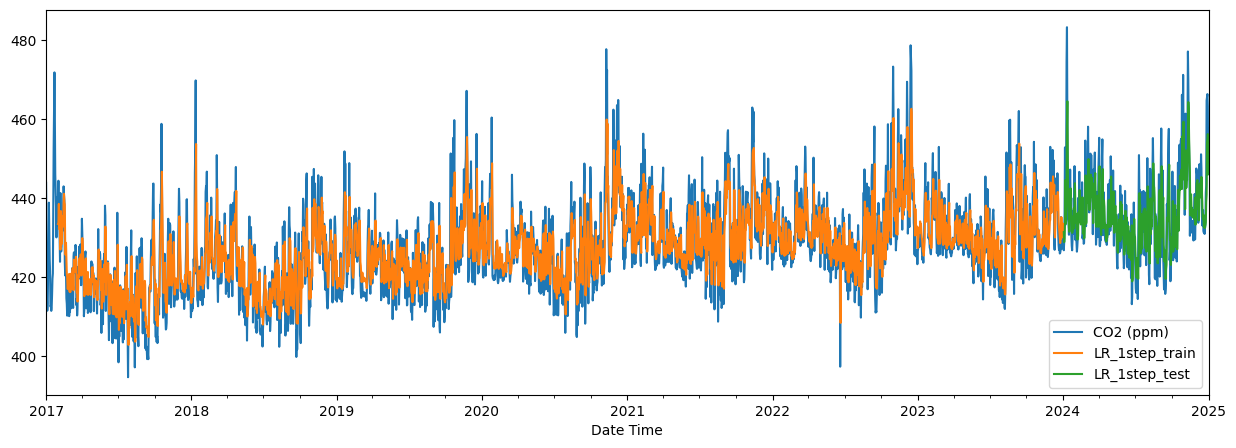

In [11]:
# plot 1-step forecast
df[['CO2 (ppm)', 'LR_1step_train', 'LR_1step_test']].plot(figsize=(15, 5));

In [12]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = lr.predict(last_x.reshape(1, -1))[0]

  # update the predictions list
  multistep_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [13]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

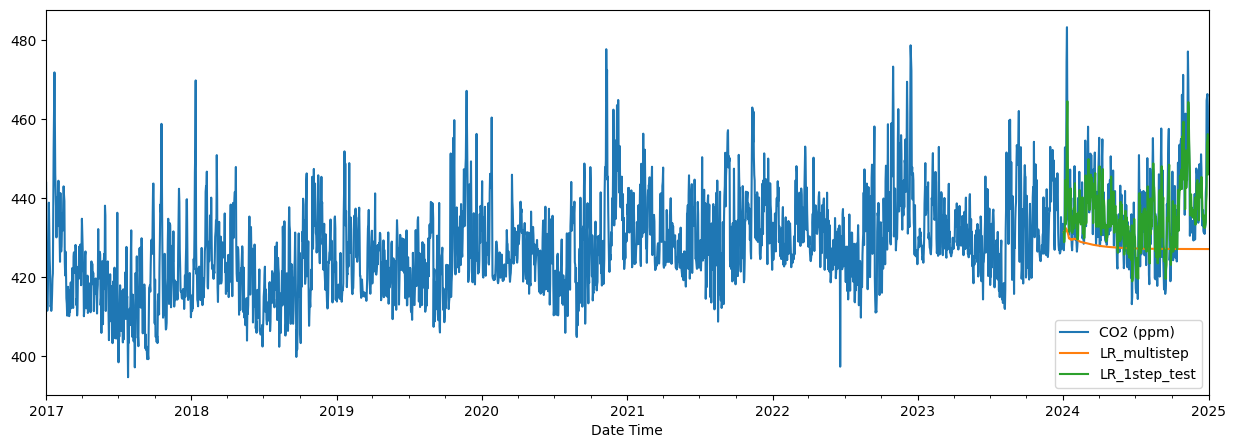

In [14]:
# plot 1-step and multi-step forecast
df[['CO2 (ppm)', 'LR_multistep', 'LR_1step_test']].plot(figsize=(15, 5));

In [15]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2529, 30) Y.shape (2529, 365)


In [16]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [17]:
lr = LinearRegression()
lr.fit(Xtrain_m, Ytrain_m)
lr.score(Xtrain_m, Ytrain_m)

0.1090406062768305

In [18]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest_m).flatten()

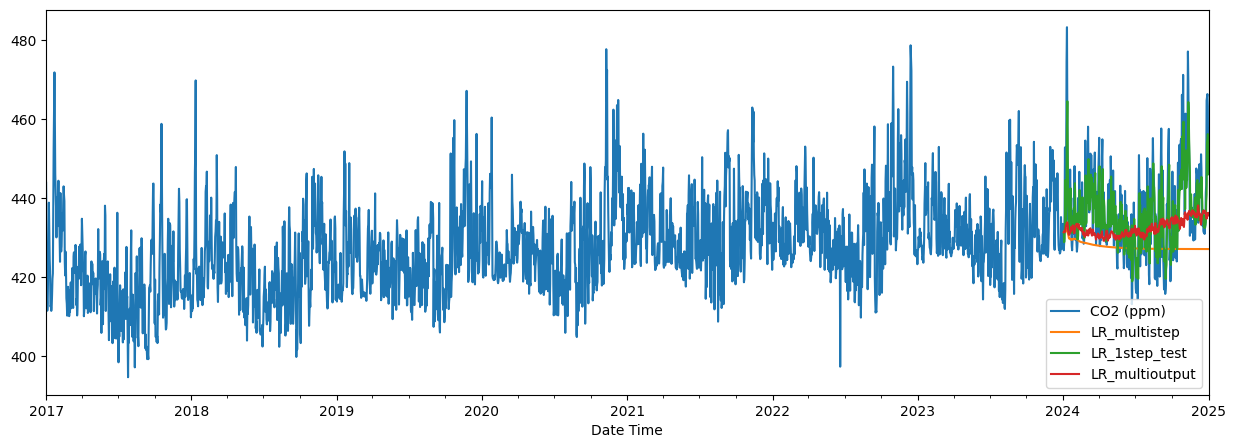

In [19]:
# plot all forecasts
cols = ['CO2 (ppm)', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));

## Other Machine Learning Models

In [20]:
df = pd.read_csv(DAILY_DATA_PATH)
df['Date Time'] = pd.to_datetime(df['Date Time'])
df.set_index('Date Time', inplace=True)
df.index.freq = '1D'

In [21]:
def one_step_and_multistep_forecast(model, name):
  model.fit(Xtrain, Ytrain)
  print("One-step forecast:", name)

  # store 1-step forecast
  df.loc[train_idx, f'{name}_1step_train'] = model.predict(Xtrain)
  df.loc[test_idx, f'{name}_1step_test'] = model.predict(Xtest)

  # RMSE of 1-step forecast
  rmse_1step = np.sqrt(mean_squared_error(Ytest, model.predict(Xtest)))
  print("Test RMSE (1-step):", rmse_1step)

  # generate multi-step forecast
  multistep_predictions = []
  last_x = Xtest[0]

  while len(multistep_predictions) < Ntest:
    p = model.predict(last_x.reshape(1, -1))[0]
    multistep_predictions.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

  # store multi-step forecast
  df.loc[test_idx, f'{name}_multistep_test'] = multistep_predictions

  # RMSE of multi-step forecast
  rmse_multistep = np.sqrt(mean_squared_error(Ytest, multistep_predictions))
  print("Test RMSE (multi-step):", rmse_multistep)

  # plot 1-step and multi-step forecast
  cols = [
    'CO2 (ppm)',
    f'{name}_1step_train',
    f'{name}_1step_test',
    f'{name}_multistep_test'
  ]
  df[cols].plot(figsize=(15, 5))

One-step forecast: LR
Test RMSE (1-step): 8.395867700435362
Test RMSE (multi-step): 14.454473898489471


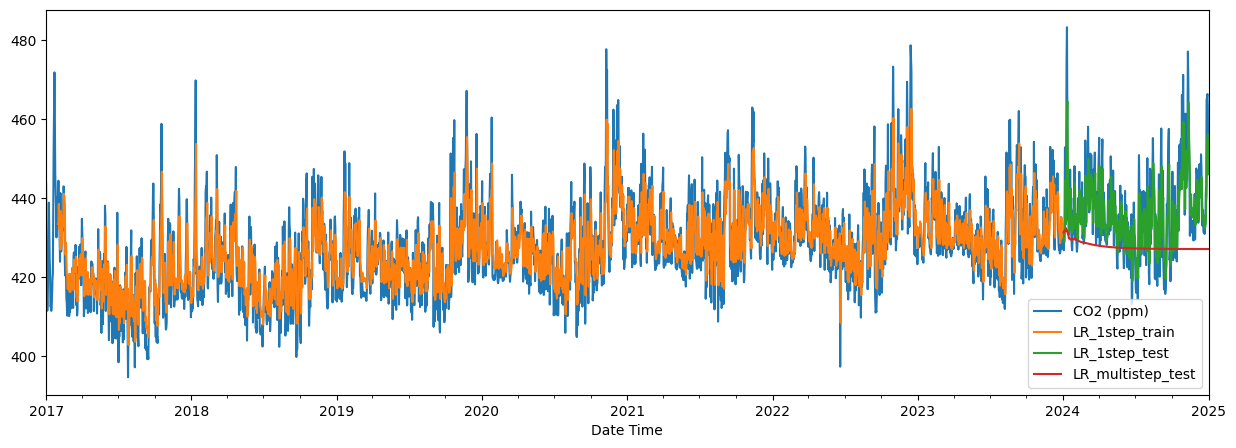

In [22]:
one_step_and_multistep_forecast(LinearRegression(), "LR")

One-step forecast: SVR
Test RMSE (1-step): 10.326966142373852
Test RMSE (multi-step): 11.969022440855117


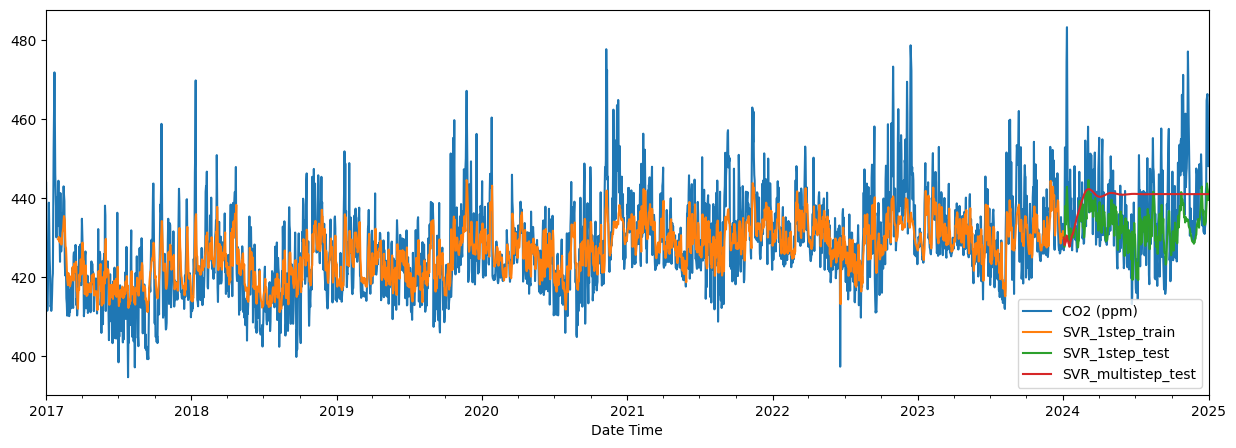

In [23]:
one_step_and_multistep_forecast(SVR(), "SVR")

One-step forecast: RF
Test RMSE (1-step): 8.577748549302125
Test RMSE (multi-step): 12.774615355666358


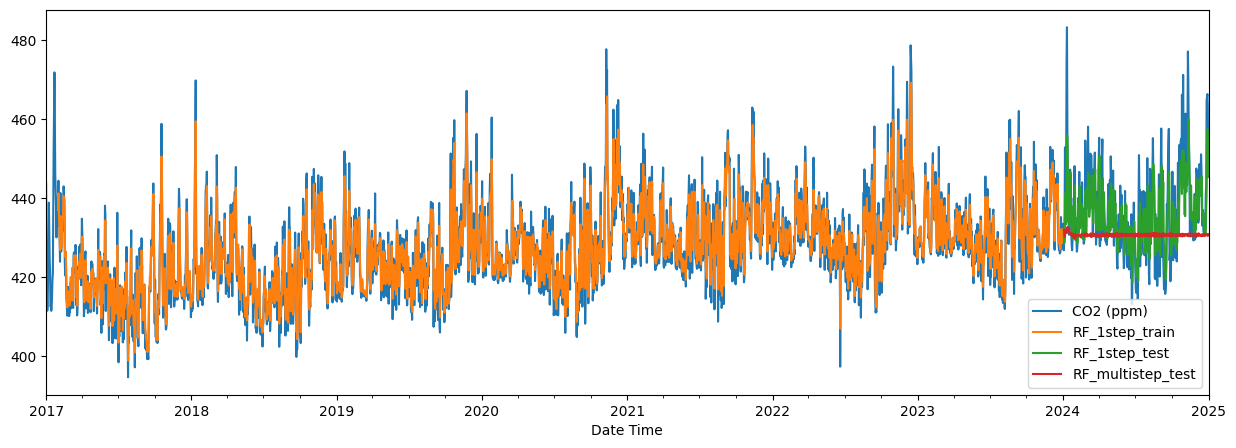

In [24]:
one_step_and_multistep_forecast(RandomForestRegressor(), "RF")